In [161]:
import numpy as np                        #행렬 연산 처리
import pandas as pd                       #데이터 처리 및 분석 
import matplotlib.pyplot as plt           #데이터 시각화 (차트화)
import seaborn as sns                     #데이터 분포 시각화

plt.style.use('seaborn')
sns.set(font_scale=2.5)                   #matplotlib 의 기본 scheme import matplotlib.pyplot as plt plt.rc('font', size=20)  # 기본 폰트 크기  이렇게 사용 하는 방법 대신
                                          # 일일이 graph 의 font size 를 지정할 필요 없이 
                                          #seaborn 의 font_scale 을 사용하는 방법.

import missingno as msno                  #결측치 시각화 패키지   

                                          #ignore warnings
import warnings
warnings.filterwarnings('ignore')

 #notebook을 실행한 브라우저에서 바로 그림  결과물(Rich output)을 볼 수 있게 해주는 것
%matplotlib inline                   

In [162]:
#데이터 불러오기
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

##1. 데이터 셋 확인하기


---

survival : 생존여부

Pclass : 티켓의 클래스 (1,2,3)

sex : 성별

Age: 나이

sibSp : 함께 탑승한 형제와 배우자의 수

parch : 함께 탑승한 부모, 아이의 수

ticket : 티켓 번호

fare : 탑승료

cabin : 객실 번호

embared : 탑승 항구

In [163]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 결측치 확인하기


---

 {:>10}: 오른쪽 정렬

 

 {:.2f}: 소수점 둘째자리까지 출력

 

 df_train[col].isnull().sum() : 해당 열의 결측치가 몇개인지 알 수 있게하는 문장

(TRUE=1(결측치), FALSE=0으로 계산)

 

 df_train[col].shape[0] : 해당 열의 차원 (열이 지정되어 있으므로 행의 갯수를 보여줍니다.)

 

 100 * (df_train[col].isnull().sum() / df_train[col].shape[0] : 쉽게 말하자면 100 * (결측치/전체 데이터)를 의미하며,


In [164]:
# 변수 별 결측치를 %로 확인해보기
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [165]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


### train set : Age, Cabin, Embarked 에 결측치 있음.
→ 시각화

<Axes: >

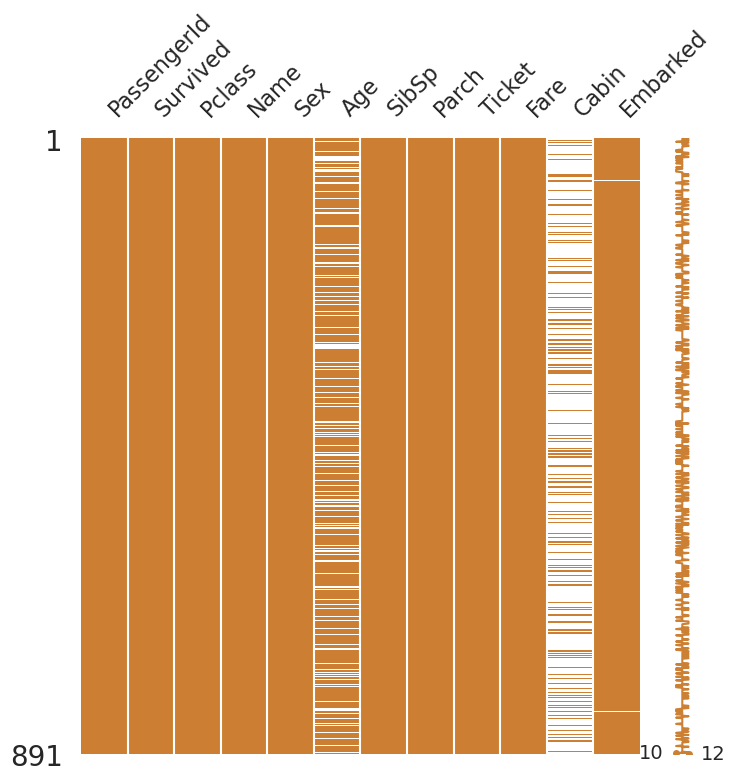

In [166]:
# missingno 패기지 (matrix 사용)
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

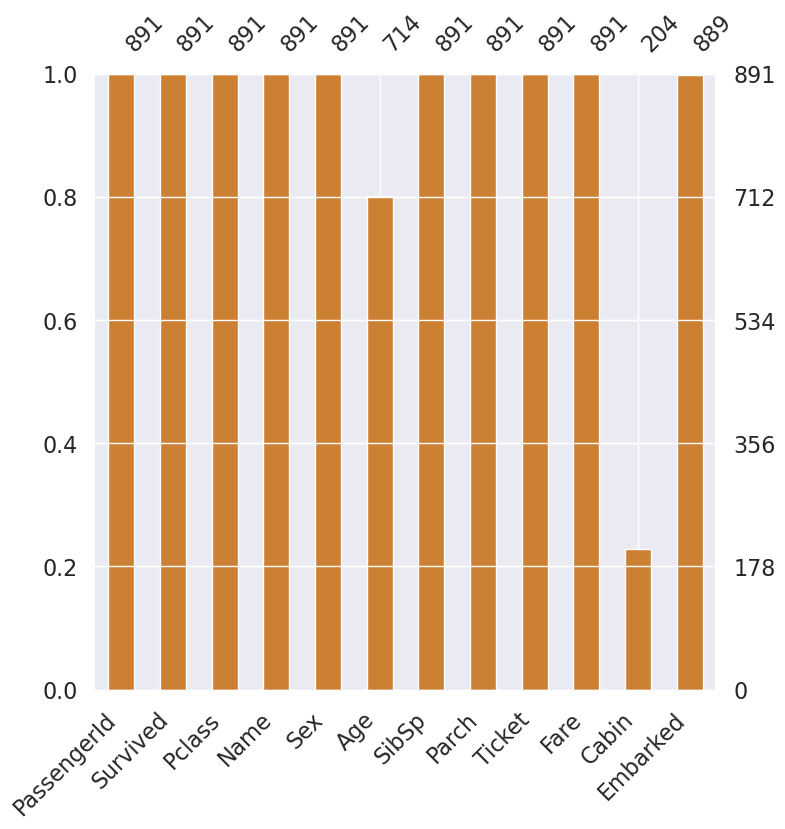

In [167]:
# Bar Chart
# color 파라미터는 RGB를 지정해주는 것
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

<Axes: >

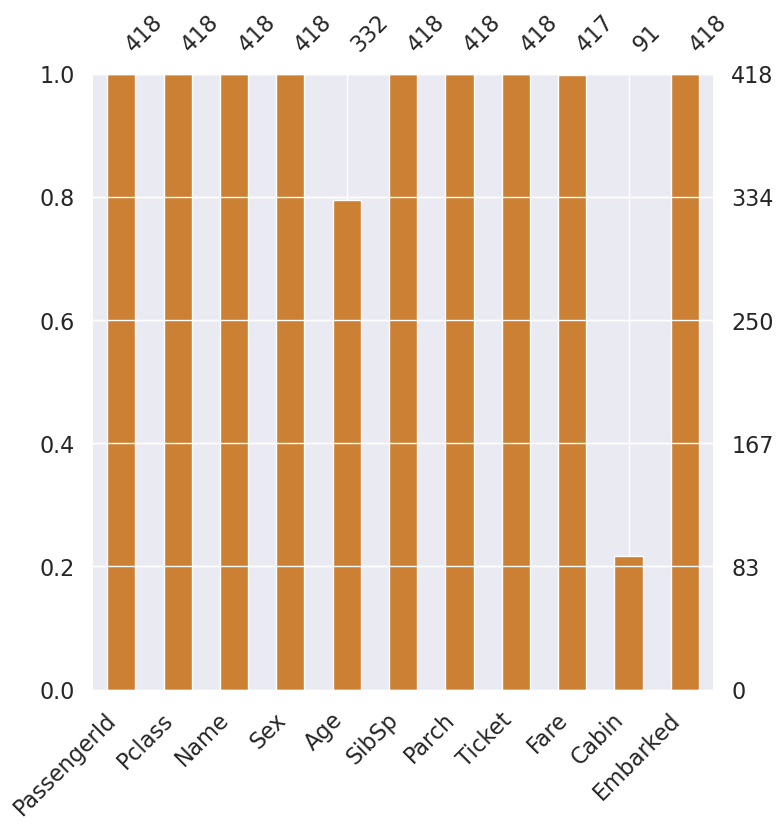

In [168]:
# Bar Chart
# color 파라미터는 RGB를 지정해주는 것
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

# 다루고자 하는 feature : Pclass, Age, SibSp, Parch, sex

# 예측하고자 하는 feature : Survived (생존 여부)

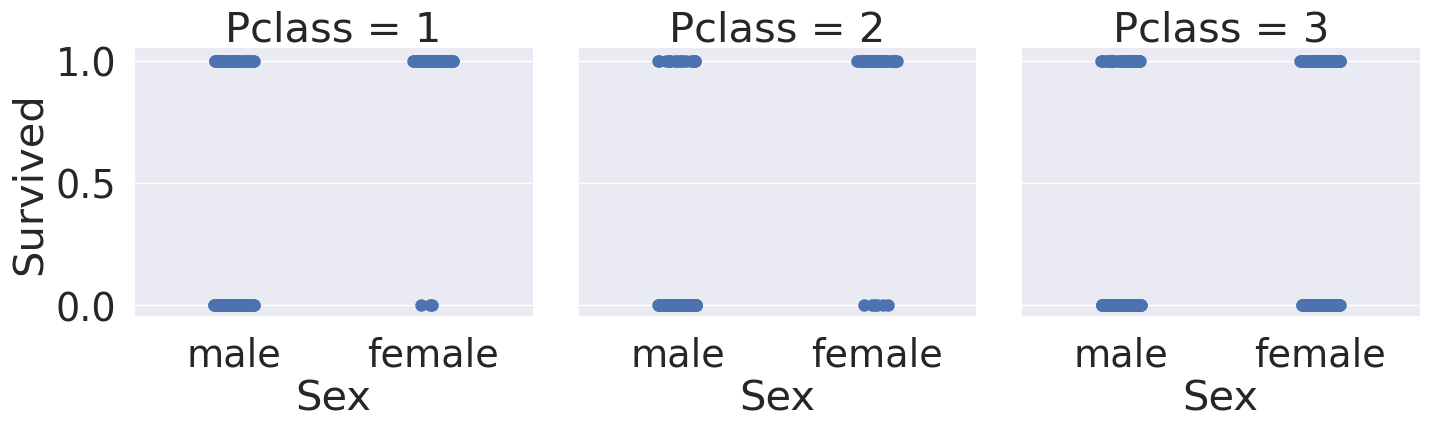

In [169]:
sns.catplot(data=df_train, x='Sex', y='Survived', col='Pclass',
               size=9, aspect=1,
              )

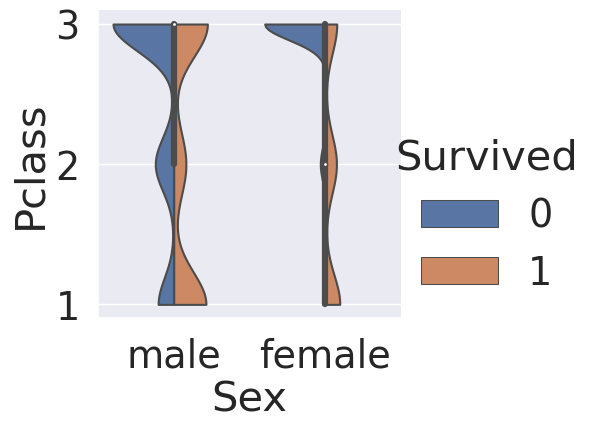

In [170]:
sns.catplot(data=df_train, x="Sex", y="Pclass", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

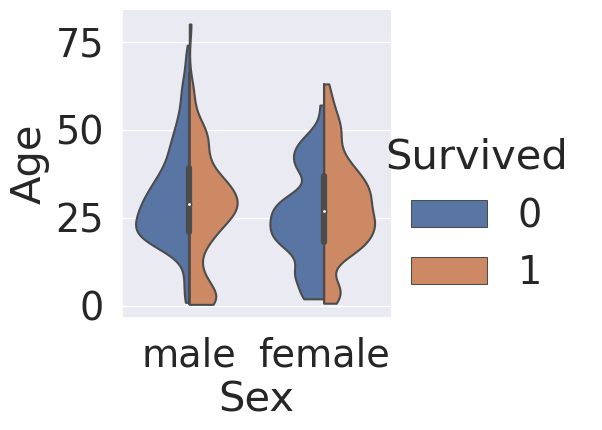

In [171]:
sns.catplot(data=df_train, x="Sex", y="Age", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

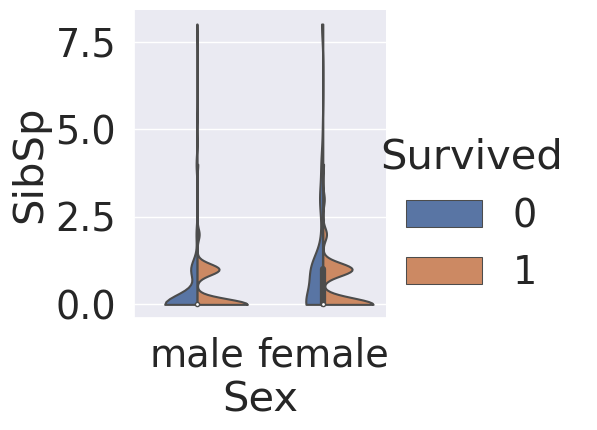

In [172]:
sns.catplot(data=df_train, x="Sex", y="SibSp", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

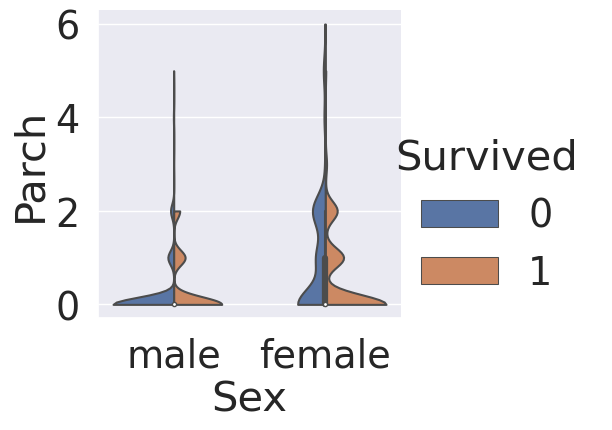

In [173]:
sns.catplot(data=df_train, x="Sex", y="Parch", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

In [174]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

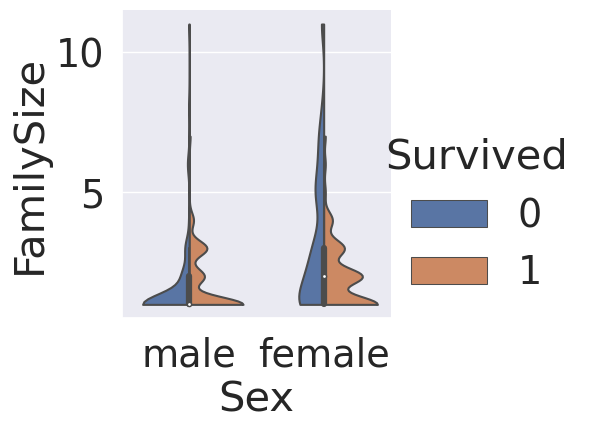

In [175]:
sns.catplot(data=df_train, x="Sex", y="FamilySize", hue="Survived", kind="violin", bw=.25, cut=0, split=True,)

In [176]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #설명글 추출하기 -> 호칭 추출
    
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #설명글 추출하기 -> 호칭 추출

In [177]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #background_gradient : 배경색, crosstab : 수치를 한눈에 볼수 있도록 시각화 하는 함수

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [178]:
# mille,miss 등 이니셜을 대표적인 여성 이니셜로 교체하기
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)


df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [179]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,1.222222


> Miss와 Mrs가 가장 높은 것을 보아 여성의 생존률이 높은것을 확인 할 수 있다.

## 2) 나이

In [180]:
# 나이를 알 수 없으니 결측값인 나이에서 이니셜별로 나이를 추측하여 평균 대입.
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

우리가 보고자 한 값중 결측값을 처리한 것들
성별, 나이, 가족구성, 자리등급 모두 완료

In [181]:
#나이대 별로 카테고리화함. 0대 10대 20대 30대 ....
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
df_test['Age_cat_2'] = df_test['Age'].apply(category_age)

In [182]:
# 나이대 별 분류를 했으니 원 데이터는 지운다. 필요 없음.
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [183]:
# 이니셜은 문자열이기 때문에 숫자 데이터로 변형

df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [184]:
# mapping
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [185]:
# get_dummies : 원 핫 인코딩 하여 결측값을 제외한 값들이 0과 1로 변함.
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [186]:
#필요한 컬럼만 남기고 다 지우기
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare','Embarked'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare','Embarked'], axis=1, inplace=True)

In [187]:
df_train.head()

,Survived,Pclass,Sex,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,0,3,1,2,2,0,0,1,0,0
1,1,1,0,2,3,0,0,0,1,0
2,1,3,0,1,2,0,1,0,0,0
3,1,1,0,2,3,0,0,0,1,0
4,0,3,1,1,3,0,0,1,0,0


In [188]:
df_test.head()

,Pclass,Sex,FamilySize,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,3,1,1,3,0,0,1,0,0
1,3,0,2,4,0,0,0,1,0
2,2,1,1,6,0,0,1,0,0
3,3,1,1,2,0,0,1,0,0
4,3,0,3,2,0,0,0,1,0


# 모델링

In [189]:
from sklearn.ensemble import RandomForestClassifier # 과적합 현상을 개선하는 트리형태의 앙상블 기법
# 앙상블 : 분류를 여러개 해서 예측하고 이를 결합하면서 정확한 예츨을 도출하는 기법
from sklearn import metrics # 평가지표
from sklearn.model_selection import train_test_split 
# 데이터를 분할 하기 위해 사용한다.
# traning set과 test set을 쉽게 나눠주는 함수

In [190]:
#필요한 컬럼만 남기고 다 지우기
df_train.drop(['Initial_1','Initial_2','Initial_3','Initial_4'], axis=1, inplace=True)
df_test.drop(['Initial_1','Initial_2','Initial_3','Initial_4'], axis=1, inplace=True)

In [191]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [192]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [193]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [194]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 83.96% 정확도로 생존을 맞춤


In [195]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [196]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [197]:
submission.to_csv('./my_second_submission.csv', index=False)